# Model Evaluation - Japanese distilbert

## 0. Imports

In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split

from data_analyzing.data_analyzer import DataAnalyzer
from evaluation.model_evaluator import ModelEvaluator
from training.model import Model

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adamdabkowski/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adamdabkowski/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adamdabkowski/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 1. Loading dataset

In [2]:
PREPROCESSED_DATA_PATH = "D:\SEM6/NLP/NLP_last_3/NLP-Fake-News-Detection\data\preprocessed/japanese"

In [3]:
data_json = pd.read_json(PREPROCESSED_DATA_PATH, orient="records", lines=True)

In [4]:
dataset_1 = data_json.loc[data_json['label'] == 1]
dataset_0 = data_json.loc[data_json['label'] == 0]

dataset = pd.concat([dataset_1, dataset_0])
dataset = dataset.sample(frac=1, random_state=10)

In [5]:
train_data, test_data = train_test_split(dataset, train_size=0.8, random_state=42)

## 2. Loading model

In [23]:
MODEL_PATH = "D:\SEM6/NLP/NLP_last_3/NLP-Fake-News-Detection\model\japanese\japanese_distilbert_base_multilingual_cased.h5py"

In [24]:
model = Model.load_saved_model(MODEL_PATH, useGPU=False)

Some layers from the model checkpoint at D:\SEM6/NLP/NLP_last_3/NLP-Fake-News-Detection\model\japanese\japanese_distilbert_base_multilingual_cased.h5py were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at D:\SEM6/NLP/NLP_last_3/NLP-Fake-News-Detection\model\japanese\japanese_distilbert_base_multilingual_cased.h5py and are newly initialized: ['dropout_39

#### 2.1 Train data

Accuracy:   0.99625
Precision:  1.0
Recall:     0.99156
F1 score:   0.99576




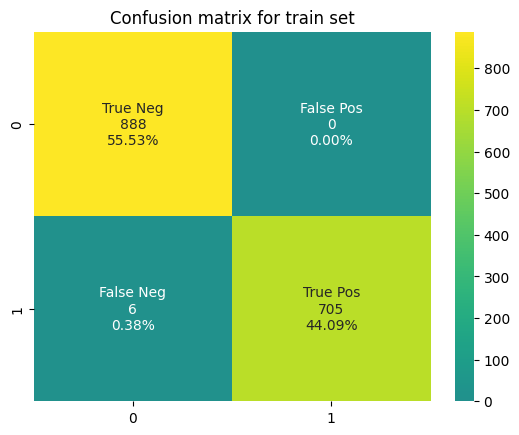

([0.99625, 1.0, 0.99156, 0.99576],
 [0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,


In [8]:
ModelEvaluator.evaluate(
    model=model,
    dataset=train_data,
    set_type="train"
)

#### 2.2 Test data

Accuracy:   0.9975
Precision:  1.0
Recall:     0.99398
F1 score:   0.99698




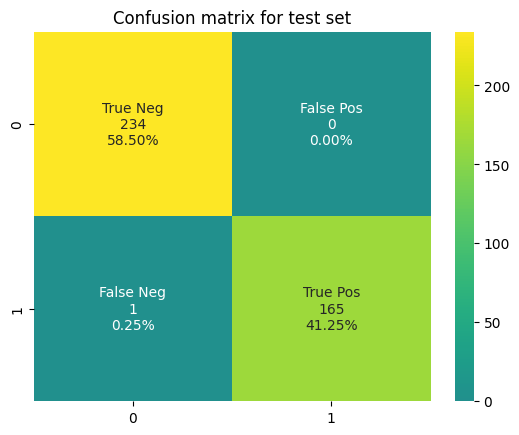

In [9]:
scores, y_true, y_pred = ModelEvaluator.evaluate(
    model=model,
    dataset=test_data,
    set_type="test"
)

In [10]:
test_data_correctly_predicted_model_v1 = ModelEvaluator.get_correctly_predicted_elements(
    dataset=test_data,
    y_true=y_true,
    y_pred=y_pred
)

In [11]:
test_data_false_predicted_model_v1 = ModelEvaluator.get_false_predicted_elements(
    dataset=test_data,
    y_true=y_true,
    y_pred=y_pred
)

## 3. Results Analyzing

#### 3.1 Polarity

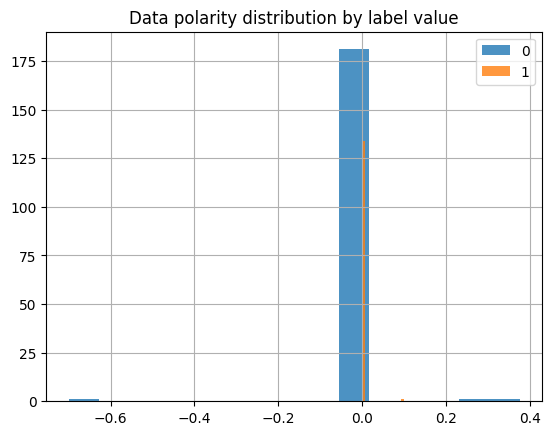

In [12]:
DataAnalyzer.plot_polarity_distribution(dataset=test_data_correctly_predicted_model_v1)

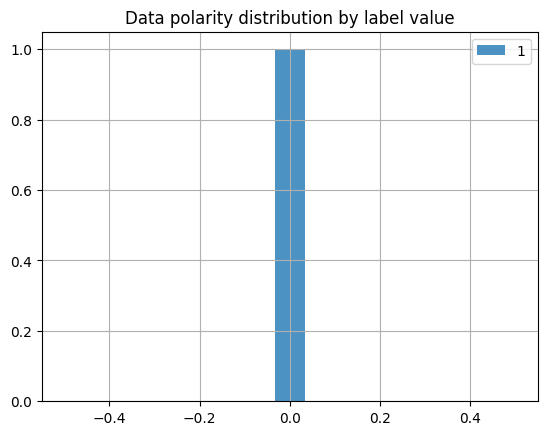

In [13]:
DataAnalyzer.plot_polarity_distribution(dataset=test_data_false_predicted_model_v1)

#### 3.2 Subjectivity

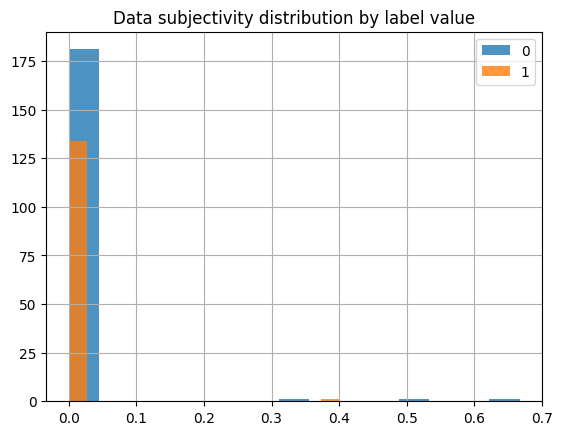

In [14]:
DataAnalyzer.plot_subjectivity_distribution(dataset=test_data_correctly_predicted_model_v1)

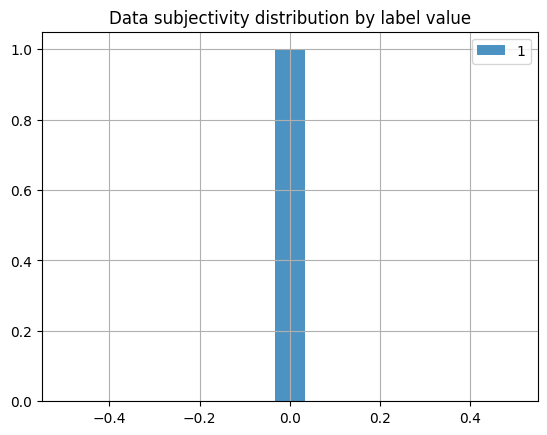

In [15]:
DataAnalyzer.plot_subjectivity_distribution(dataset=test_data_false_predicted_model_v1)

#### 3.3 Most Popular Words map

In [16]:
most_popular_words_correct = DataAnalyzer.get_most_popular_words(
    dataset=test_data_correctly_predicted_model_v1,
    language="japanese",
    most_popular_words_num=100,
    label_type=None
)

D:\SEM6\NLP\NLP_leaned_last\NLP-Project\data_analyzing\data_analyzer.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset.apply(DataAnalyzer.__remove_unicode_chars_row, axis=1)
D:\SEM6\NLP\NLP_leaned_last\NLP-Project\data_analyzing\data_analyzer.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset.apply(DataAnalyzer.__remove_stopwords_row, axis=1)


In [17]:
most_popular_words_false = DataAnalyzer.get_most_popular_words(
    dataset=test_data_false_predicted_model_v1,
    language="japanese",
    most_popular_words_num=100,
    label_type=None
)

D:\SEM6\NLP\NLP_leaned_last\NLP-Project\data_analyzing\data_analyzer.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset.apply(DataAnalyzer.__remove_unicode_chars_row, axis=1)
D:\SEM6\NLP\NLP_leaned_last\NLP-Project\data_analyzing\data_analyzer.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset.apply(DataAnalyzer.__remove_stopwords_row, axis=1)


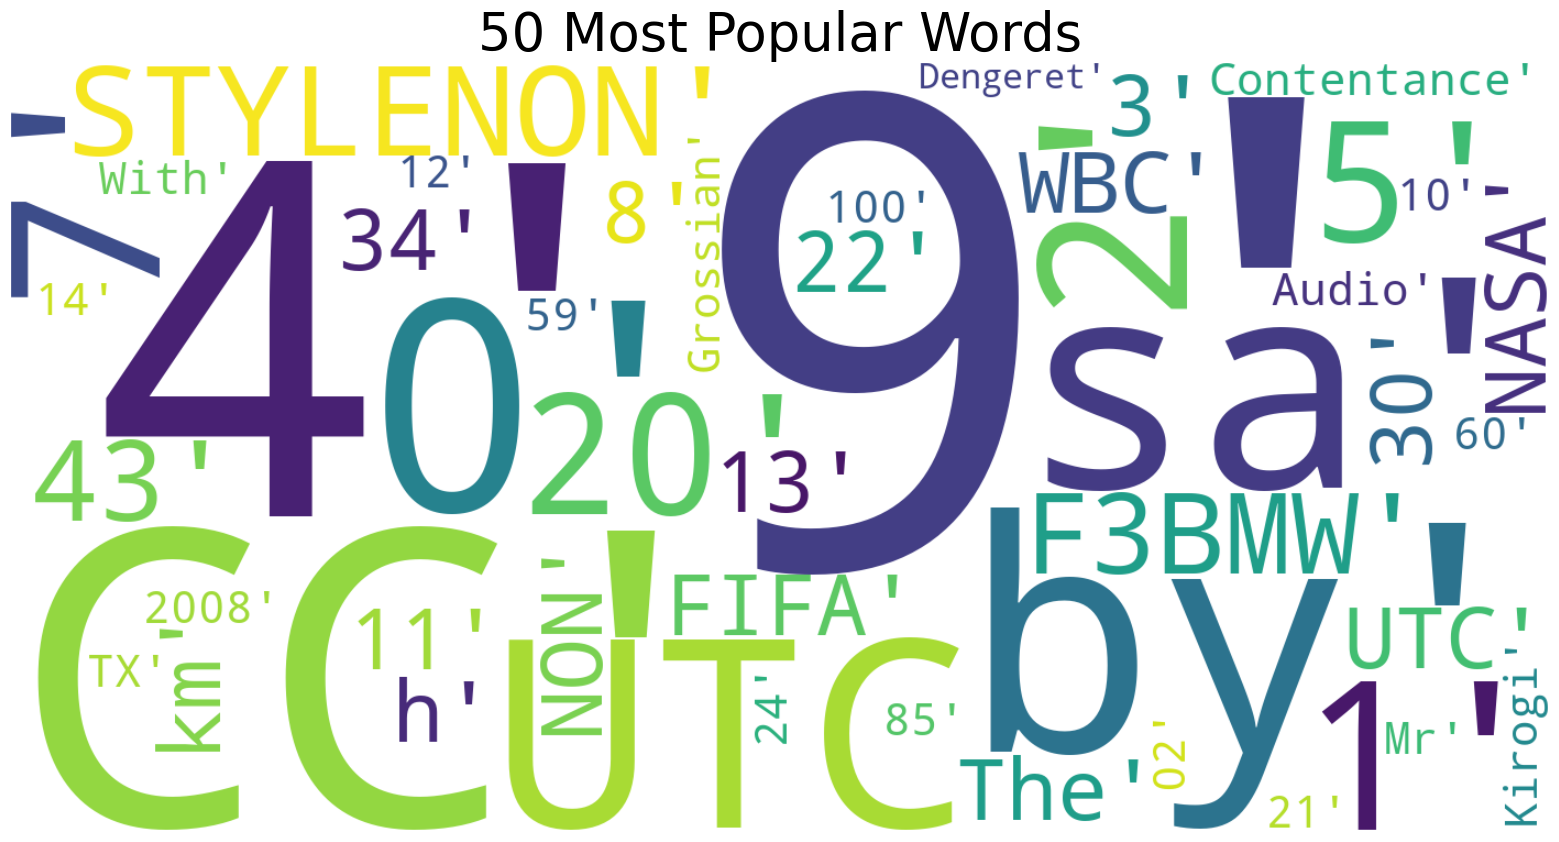

In [18]:
DataAnalyzer.plot_most_popular_words_map(
    most_popular_words=most_popular_words_correct,
    most_popular_words_num=50,
    label_type=None
)

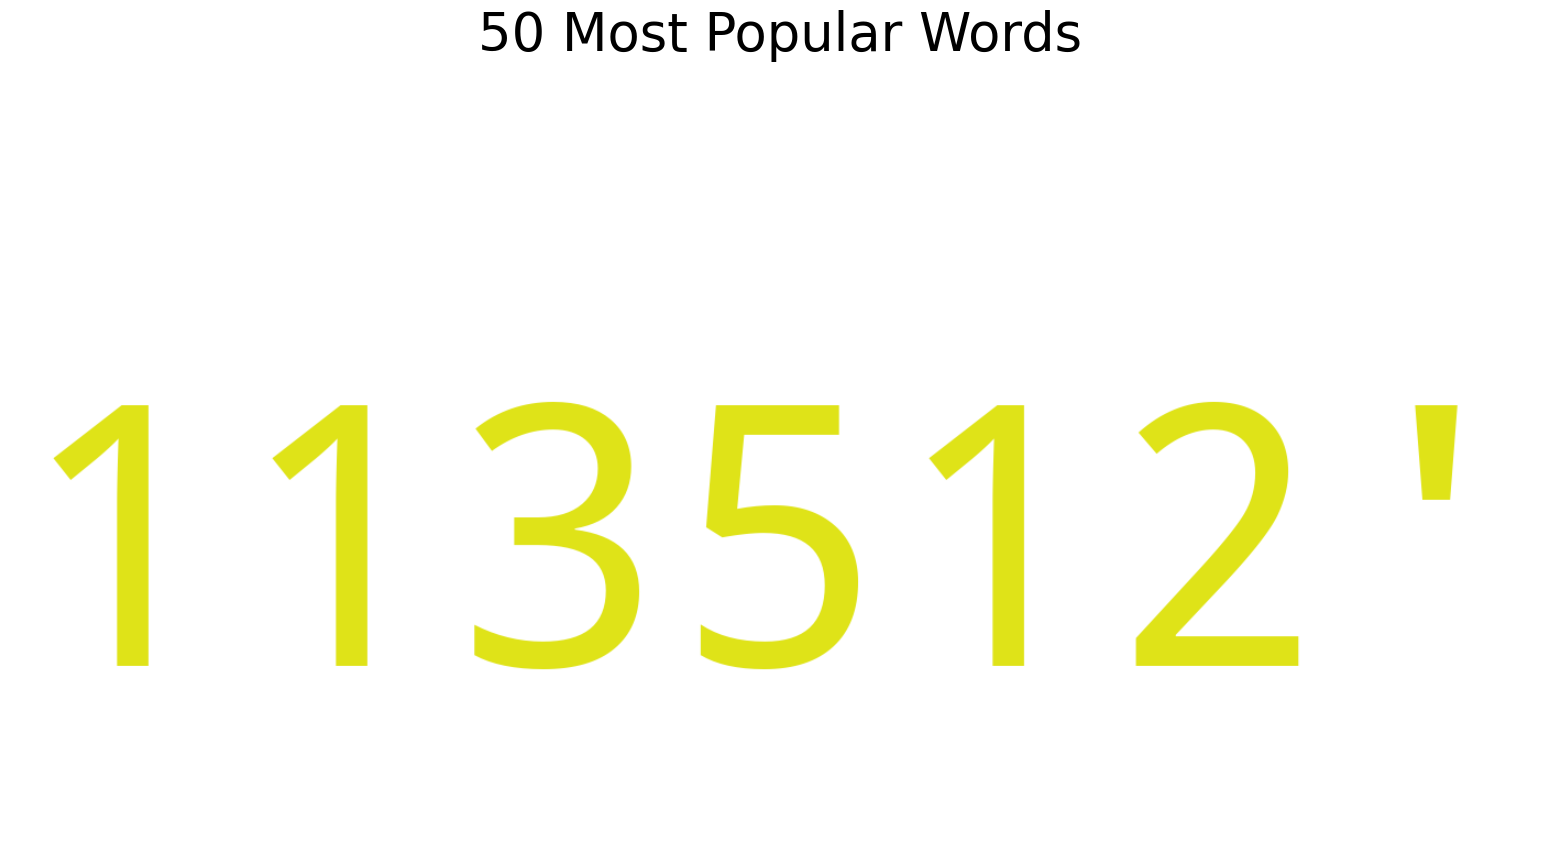

In [19]:
DataAnalyzer.plot_most_popular_words_map(
    most_popular_words=most_popular_words_false,
    most_popular_words_num=50,
    label_type=None
)

#### 3.4 Most Popular Words Histogram

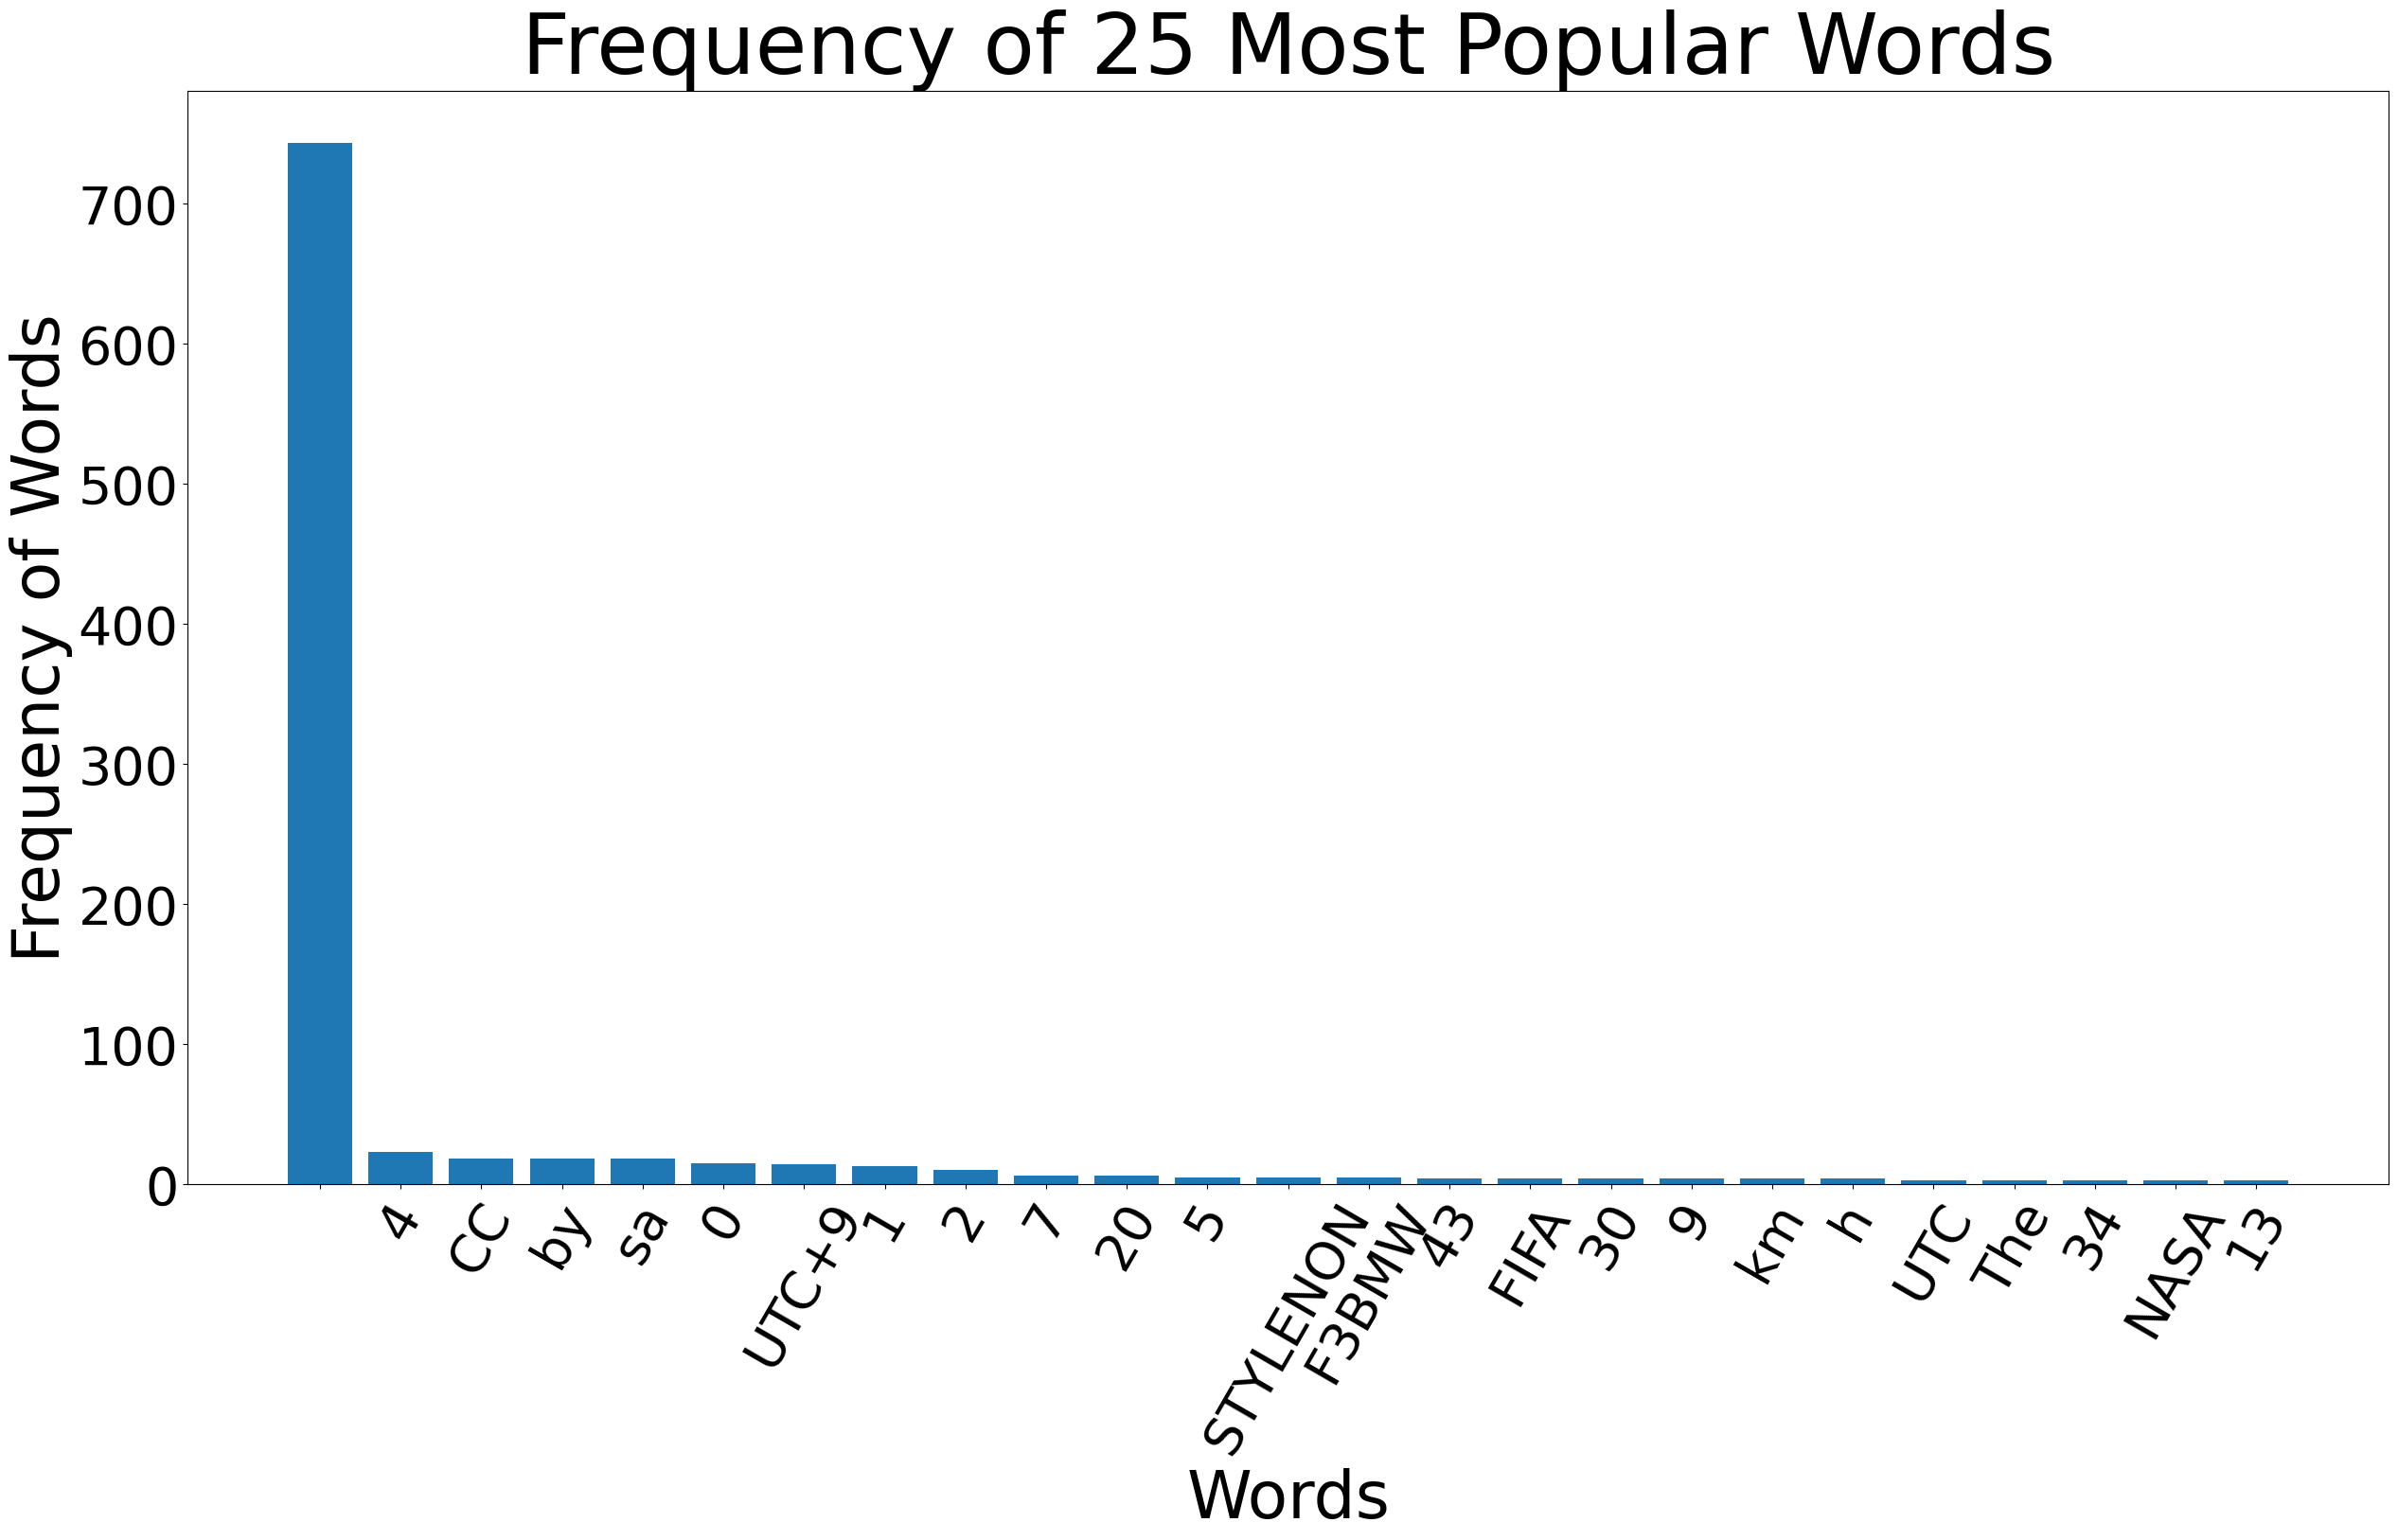

In [20]:
DataAnalyzer.plot_most_popular_words_histogram(
    most_popular_words=most_popular_words_correct,
    most_popular_words_num=25,
    label_type=None
)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


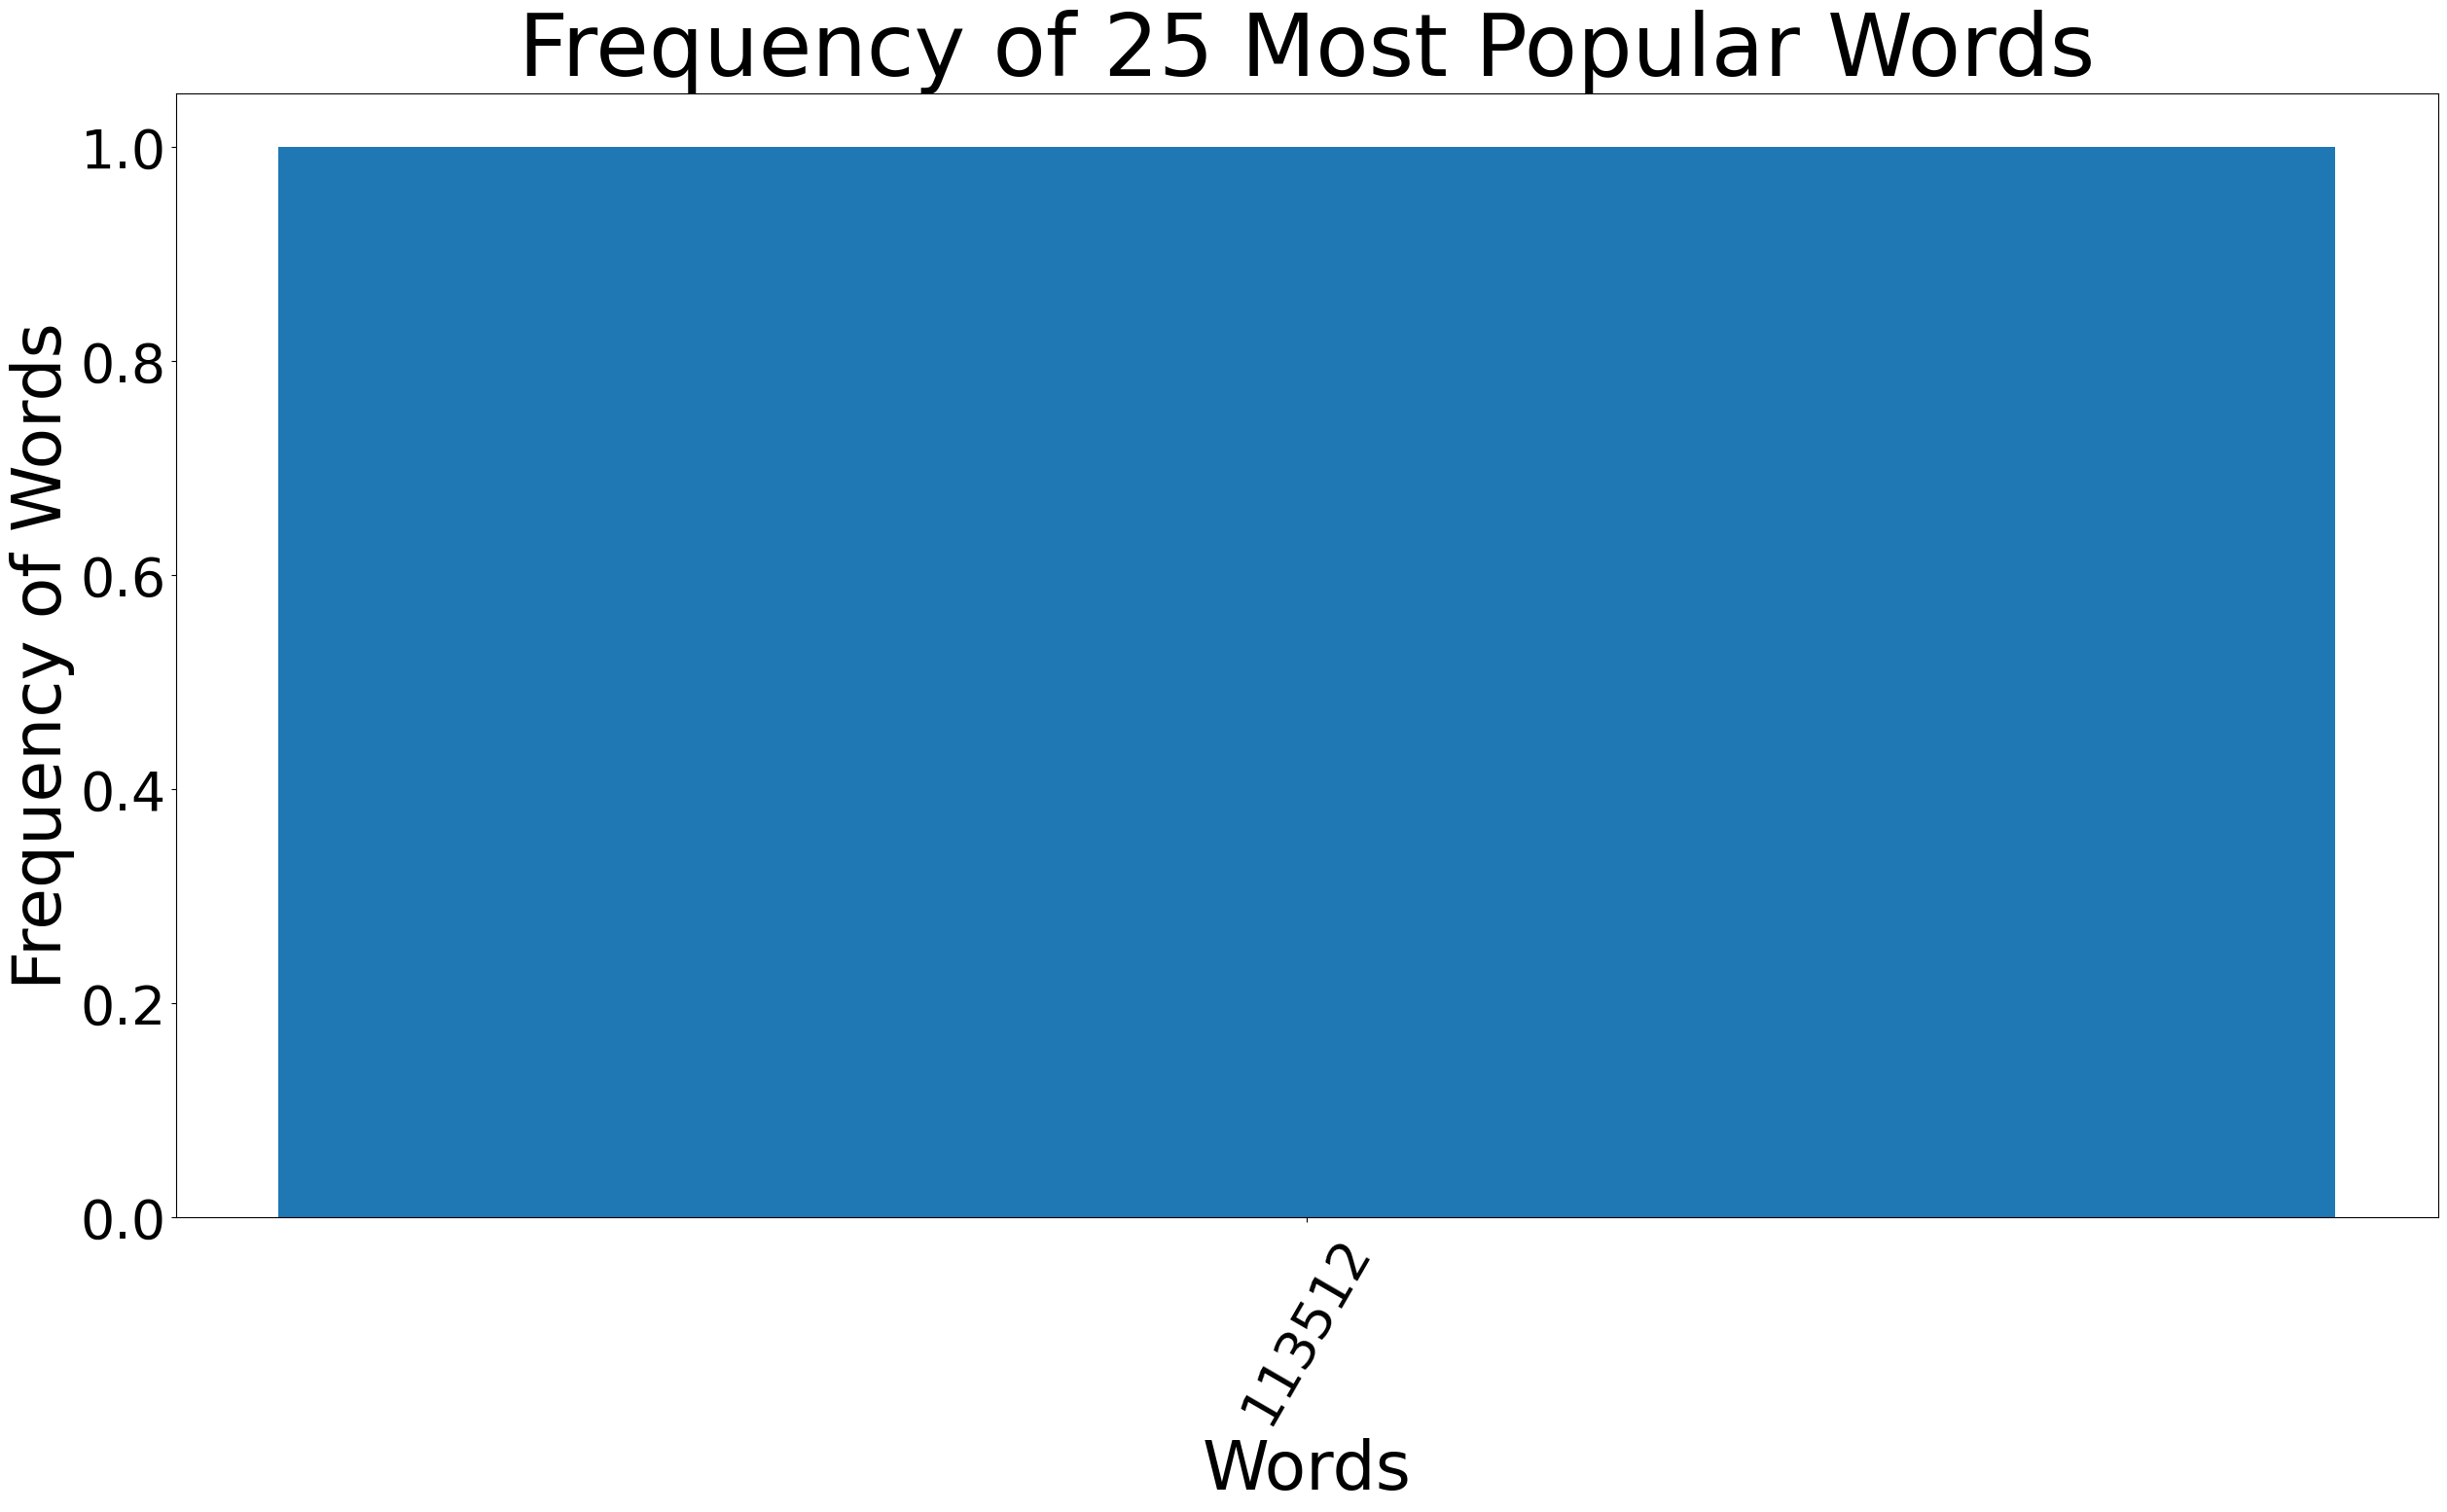

In [21]:
DataAnalyzer.plot_most_popular_words_histogram(
    most_popular_words=most_popular_words_false,
    most_popular_words_num=25,
    label_type=None
)

In [25]:
text = "朝日新聞など各社の報道によれば、宅配便最大手「ヤマト運輸」が日本郵政公社を相手取り、大手コンビニエンスストア「ローソン」でのサービス提供の差し止めなどを求めていた訴訟で、2006年1月19日、東京地方裁判所でヤマト運輸の請求を棄却する判決が下された。2004年のローソンでの郵便小包サービス「ゆうパック」の受付業務開始に際し、ヤマト運輸は「独占禁止法に違反する不当な廉売」として、日本郵政公社を相手取り、サービス提供の差し止めなどを求めていた。朝日新聞によれば、提訴の内容は、2004年11月のローソンでの「ゆうパック」の受付サービス提供の開始に関連し、租税などの優遇措置を受けている日本郵政公社が、配送料金（運賃）などの有利な取引条件でローソンで「ゆうパック」を開始させたのは、独占禁止法の不当廉売に当たり、ヤマト運輸の利益を侵害されるとして、「ゆうパック」サービス提供の差し止めなどを求めていたもの。朝日新聞によれば、判決内容はヤマト運輸の主張を全面的に否定しており、今後の「ゆうパック」サービスの拡大に弾みがつくものと考えられる。日本郵政公社は、公正妥当な判決とのコメントを出した。一方、ヤマト運輸は、高等裁判所への控訴など、今後の対応については検討するとアナウンスしている。"
prediction = model.classify_text(text=text)

Predicted class: 1
Probability distribution: [0.0016115 0.9983885]


In [30]:
ACCURACY_TRAIN_PATH = "/Users/adamdabkowski/PycharmProjects/NLP-Project/series_data/japanese/accuracy_train.csv"
ACCURACY_VALIDATION_PATH = "/Users/adamdabkowski/PycharmProjects/NLP-Project/series_data/japanese/accuracy_validation.csv"
LOSS_TRAIN_PATH = "/Users/adamdabkowski/PycharmProjects/NLP-Project/series_data/japanese/loss_train.csv"
LOSS_VALIDATION_PATH = "/Users/adamdabkowski/PycharmProjects/NLP-Project/series_data/japanese/loss_validation.csv"

accuracy_train = pd.read_csv(ACCURACY_TRAIN_PATH)["Value"]
accuracy_validation = pd.read_csv(ACCURACY_VALIDATION_PATH)["Value"]
loss_train = pd.read_csv(LOSS_TRAIN_PATH)["Value"]
loss_validation = pd.read_csv(LOSS_VALIDATION_PATH)["Value"]

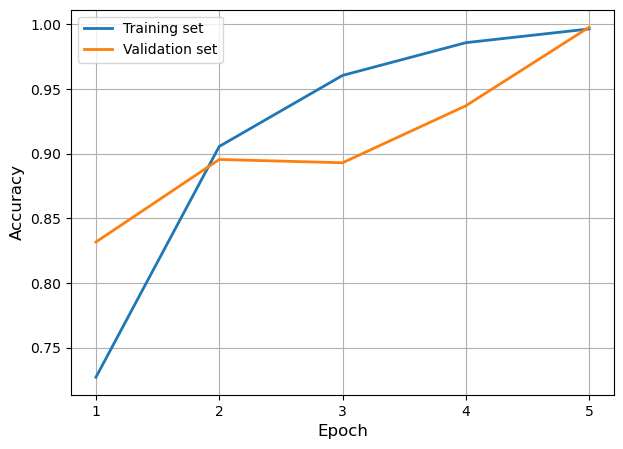

In [31]:
ModelEvaluator.plot_history(
    train_history=accuracy_train,
    validation_history=accuracy_validation,
    metric="Accuracy"
)

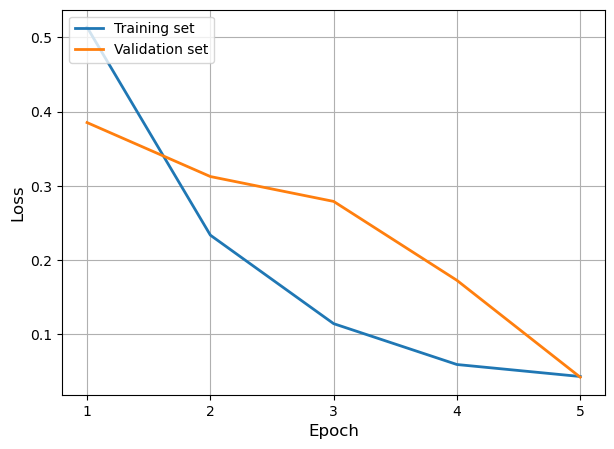

In [32]:
ModelEvaluator.plot_history(
    train_history=loss_train,
    validation_history=loss_validation,
    metric="Loss"
)